<a href="https://colab.research.google.com/github/mehrshad98/UrbanFloodPredictor/blob/main/ML_Assignment_2023_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

The files to download:

[**Description File**](https://drive.google.com/file/d/1RIh5XnQhMvCYLTjSw5TR8I6TjVEkTzqK/view?usp=sharing)

[Assignment zip file](https://drive.google.com/file/d/1gKhhdxr0KhFw6S7SeWao6Nzm_4rAxe1U/view?usp=sharing)


# Notes:
- The parameters in `training_parameters.csv` and `./test_parameters.csv` are the average of those parameters in the urban area. We don't have the microscopic values for each edge/street.

These parameters include:
  -	**ObservationIndex**: an identifier for the observation.
  -	**SurfaceType**: Type of urban surface.
  -	Waterflow: (it’s named **RainfallIntensity** in the CSV file) Intensity and duration of water flow.
  -	InitialWaterLevels: (it’s named as **Init_Max_hour** in the CSV file) Pre-simulation underground water level.
  -	**DrainageSystemCapacity**: Indicator of drainage efficiency.
  -	**GreenSpaceRatio**: Proportion of greenery in the urban area.


#Load Data

In [70]:
from google.colab import drive
import os
import pandas as pd


# Mount Google Drive to /content/drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
training_params_path = "/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/training_parameters.csv"
training_params_df = pd.read_csv(training_params_path) #training_set


In [72]:

folder_path = "/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/training"
all_files = os.listdir(folder_path)

merged_dfs = []

for observation_index in training_params_df['ObservationIndex']:
    # Construct the filename based on the ObservationIndex
    filename = f'{observation_index}.csv'

    # Check if the file exists
    if filename in all_files:
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file for the current ObservationIndex with correct separator
        df = pd.read_csv(file_path, sep=',')

        # Add 'ObservationIndex' to the separate CSV file
        df['ObservationIndex'] = observation_index

        merged_dfs.append(df)
    else:
        print(f"Warning: File {filename} not found")

# Concatenate the DataFrames
final_df = pd.concat(merged_dfs, ignore_index=True)

# Merge final_df with training_params_df on 'ObservationIndex'
final_df = pd.merge(final_df, training_params_df, on='ObservationIndex')

# Reorder columns for better clarity
final_df = final_df[['ObservationIndex', 'SurfaceType', 'RainfallIntensity',
                     'init_max_hour', 'DrainageSystemCapacity', 'GreenSpaceRatio',
                     'head_id', 'tail_id', 'flooded_init', 'flooded_final']]



In [73]:
test_csv_path = "/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/test_parameters.csv"
test_df = pd.read_csv(test_csv_path) #test_set


In [74]:

folder_path = "/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/test"
all_files = os.listdir(folder_path)

merged_dfs = []

for observation_index in test_df['ObservationIndex']:
    # Construct the filename based on the ObservationIndex
    filename = f'{observation_index}.csv'

    # Check if the file exists
    if filename in all_files:
        file_path = os.path.join(folder_path, filename)

        # Read the CSV file for the current ObservationIndex with correct separator
        df = pd.read_csv(file_path, sep=',')

        # Add 'ObservationIndex' to the separate CSV file
        df['ObservationIndex'] = observation_index

        merged_dfs.append(df)
    else:
        print(f"Warning: File {filename} not found")

# Concatenate the DataFrames
final_test_df = pd.concat(merged_dfs, ignore_index=True)

# Merge final_df with test_df on 'ObservationIndex'
final_test_df = pd.merge(final_test_df, test_df, on='ObservationIndex')

# Reorder columns for better clarity
final_test_df = final_test_df[['ObservationIndex', 'SurfaceType', 'RainfallIntensity',
                     'init_max_hour', 'DrainageSystemCapacity', 'GreenSpaceRatio',
                     'head_id', 'tail_id', 'flooded_init']]


In [75]:
# Save the final merged DataFrame to a CSV file if needed
final_df.to_csv('/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/training_data.csv', index=False)


In [76]:
final_test_df.to_csv('/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/test_data.csv', index=False)


#Understanding the Data

In [25]:
import pandas as pd
import numpy as np

In [26]:
print(final_df.sample(5, random_state=42))
#Return a random sample of items

        ObservationIndex SurfaceType  RainfallIntensity  init_max_hour  \
508873              2664           B                  4              4   
205615              1076           D                  4              3   
220126              1152           B                  5              4   
240474              1259           C                  4              5   
318463              1667           B                  4              3   

        DrainageSystemCapacity  GreenSpaceRatio    head_id    tail_id  \
508873                    0.27             0.11  152361421  152361424   
205615                    0.28             0.19  152443834  152909837   
220126                    0.27             0.14  152443827  153233144   
240474                    0.27             0.11  151779763  152541738   
318463                    0.23             0.12  152432904  153143284   

        flooded_init  flooded_final  
508873          True           True  
205615         False          False  
22

In [27]:
# Display basic information about the dataset
print(final_df.info(),'\n\n')

# Display summary statistics of numerical columns
print(final_df.describe(),'\n\n')

# Check for missing values
print(final_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573000 entries, 0 to 572999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ObservationIndex        573000 non-null  int64  
 1   SurfaceType             573000 non-null  object 
 2   RainfallIntensity       573000 non-null  int64  
 3   init_max_hour           573000 non-null  int64  
 4   DrainageSystemCapacity  573000 non-null  float64
 5   GreenSpaceRatio         573000 non-null  float64
 6   head_id                 573000 non-null  int64  
 7   tail_id                 573000 non-null  int64  
 8   flooded_init            573000 non-null  bool   
 9   flooded_final           573000 non-null  bool   
dtypes: bool(2), float64(2), int64(5), object(1)
memory usage: 40.4+ MB
None 


       ObservationIndex  RainfallIntensity  init_max_hour  \
count     573000.000000      573000.000000  573000.000000   
mean        1499.500000           2.157

#Preprocessing

###Replace the head_id and tail_id columns with information from the edge_info.csv file

In [28]:

# Load the edge_info.csv file
edge_info_df = pd.read_csv('/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/edge_info.csv')

# Merge the main dataset with edge_info_df based on head_id and tail_id
df = pd.merge(edge_info_df[['head_id', 'longitude', 'latitude', 'altitude']],
              final_df, how='right', on='head_id')

# Drop the original head_id and tail_id columns
df.drop(['head_id', 'tail_id'], axis=1, inplace=True)


df.sample(5, random_state=42)



,longitude,latitude,altitude,ObservationIndex,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,flooded_init,flooded_final
500935,-95.377158,29.796617,861.8,1156,B,3,5,0.23,0.13,False,False
1080732,-95.381020,29.794728,912.8,2495,A,4,5,0.28,0.20,False,False
242334,-95.379092,29.792983,924.6,559,D,4,3,0.16,0.11,False,False
1053890,-95.381008,29.794020,966.8,2433,B,3,3,0.20,0.21,False,False
700070,-95.377929,29.792612,987.3,1616,C,3,4,0.11,0.23,False,False


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299000 entries, 0 to 1298999
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   longitude               1299000 non-null  float64
 1   latitude                1299000 non-null  float64
 2   altitude                1299000 non-null  float64
 3   ObservationIndex        1299000 non-null  int64  
 4   SurfaceType             1299000 non-null  object 
 5   RainfallIntensity       1299000 non-null  int64  
 6   init_max_hour           1299000 non-null  int64  
 7   DrainageSystemCapacity  1299000 non-null  float64
 8   GreenSpaceRatio         1299000 non-null  float64
 9   flooded_init            1299000 non-null  bool   
 10  flooded_final           1299000 non-null  bool   
dtypes: bool(2), float64(5), int64(3), object(1)
memory usage: 101.6+ MB


##Feature Engineering

In [30]:
#Create an interaction term between 'RainfallIntensity' and 'GreenSpaceRatio'
df['Rainfall_GreenSpace'] = df['RainfallIntensity'] * df['GreenSpaceRatio']

# Drop the original GreenSpaceRatio and RainfallIntensity columns
df.drop(['GreenSpaceRatio', 'RainfallIntensity'], axis=1, inplace=True)

# Reorder columns for better clarity
df = df[['longitude', 'latitude', 'altitude', 'SurfaceType',
                     'init_max_hour','DrainageSystemCapacity', 'Rainfall_GreenSpace',
                     'flooded_init', 'flooded_final']]

##Explore the Data

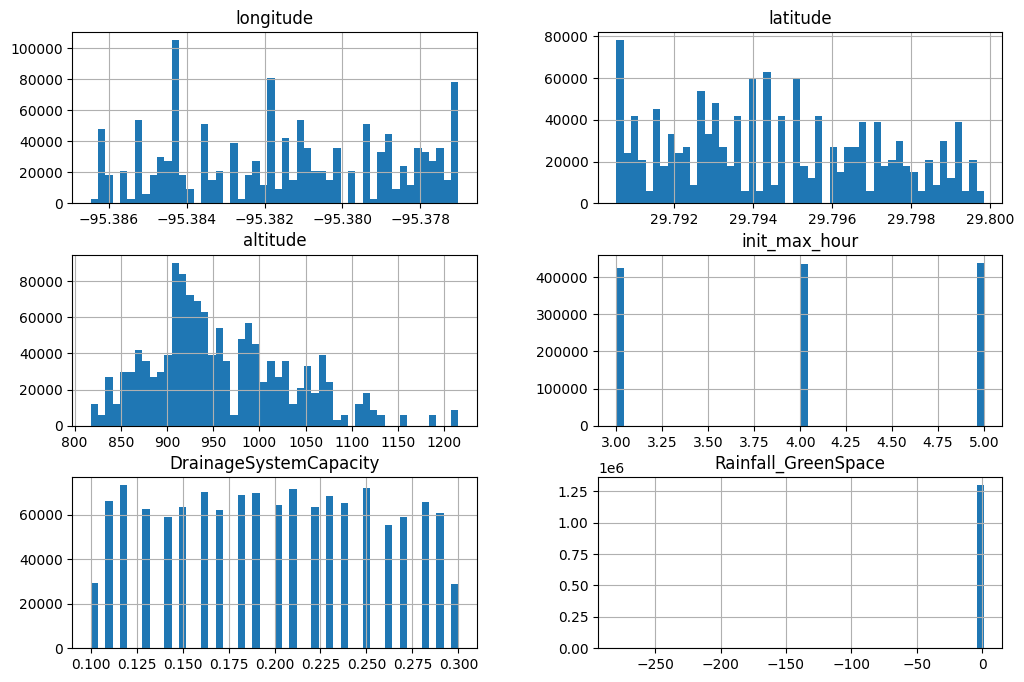

In [31]:
#plot data
import seaborn as sns
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(12, 8))
plt.show()

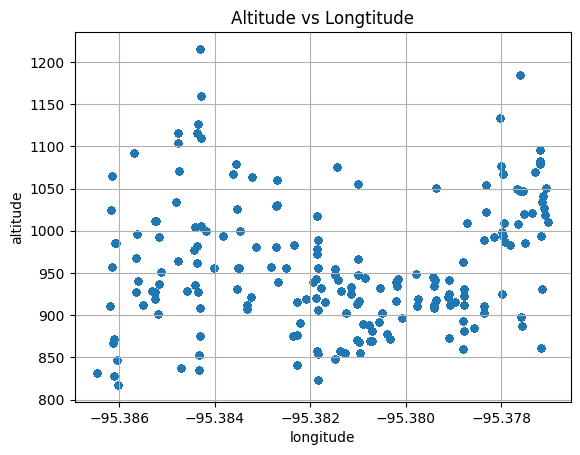

In [32]:

df.plot(kind="scatter", x="longitude", y="altitude", grid=True)
plt.title('Altitude vs Longtitude')
plt.show()

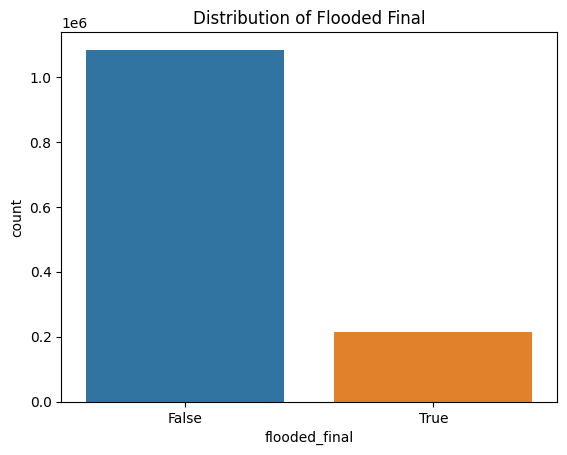

Percentage of False values in 'flooded_final': 83.41%


In [33]:
# Count plot of 'flooded_final'
sns.countplot(x='flooded_final', data=df)
plt.title('Distribution of Flooded Final')
plt.show()

# Calculate percentage of False values in 'bool_col'
false_percentage = (df['flooded_final'].value_counts(normalize=True) * 100).get(False, 0)

print(f"Percentage of False values in 'flooded_final': {false_percentage:.2f}%")

As it is shown in diagram above the target data is imbalenced.

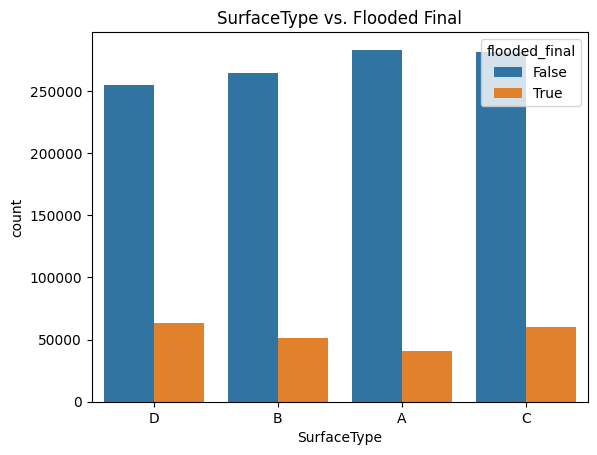

In [34]:
# Count plot of 'SurfaceType' with respect to 'flooded_final'
sns.countplot(x='SurfaceType', hue='flooded_final', data=df)
plt.title('SurfaceType vs. Flooded Final')
plt.show()


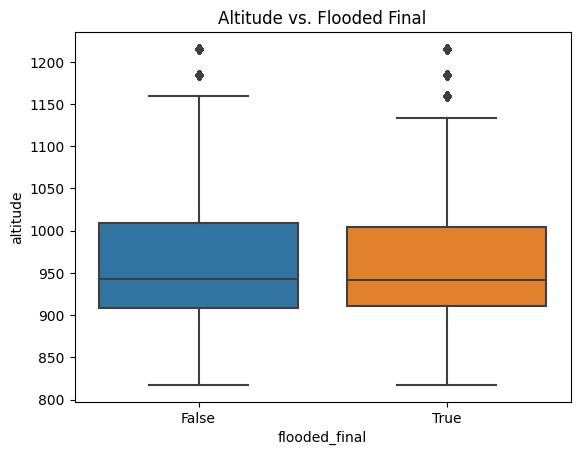

In [35]:
# Box plot of 'Rainfall_GreenSpace' with respect to 'flooded_final'
sns.boxplot(x='flooded_final', y='altitude', data=df)
plt.title('Altitude vs. Flooded Final')
plt.show()


## Outlier Detection and Treatment


In [ ]:
# Define numerical columns
numerical_cols = ['longitude', 'latitude', 'altitude', 'init_max_hour',
                  'DrainageSystemCapacity', 'Rainfall_GreenSpace']

# Visualize the distribution of numerical features before outlier treatment using subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 15))

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} Before Outlier Treatment')

plt.tight_layout()
plt.show()

Following the illustrations above, There are some outliers in altitude and Rainfall_GreenSpace

In [37]:
# Outlier detection and treatment using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside the bounds with NaN
    df[col] = df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else None)


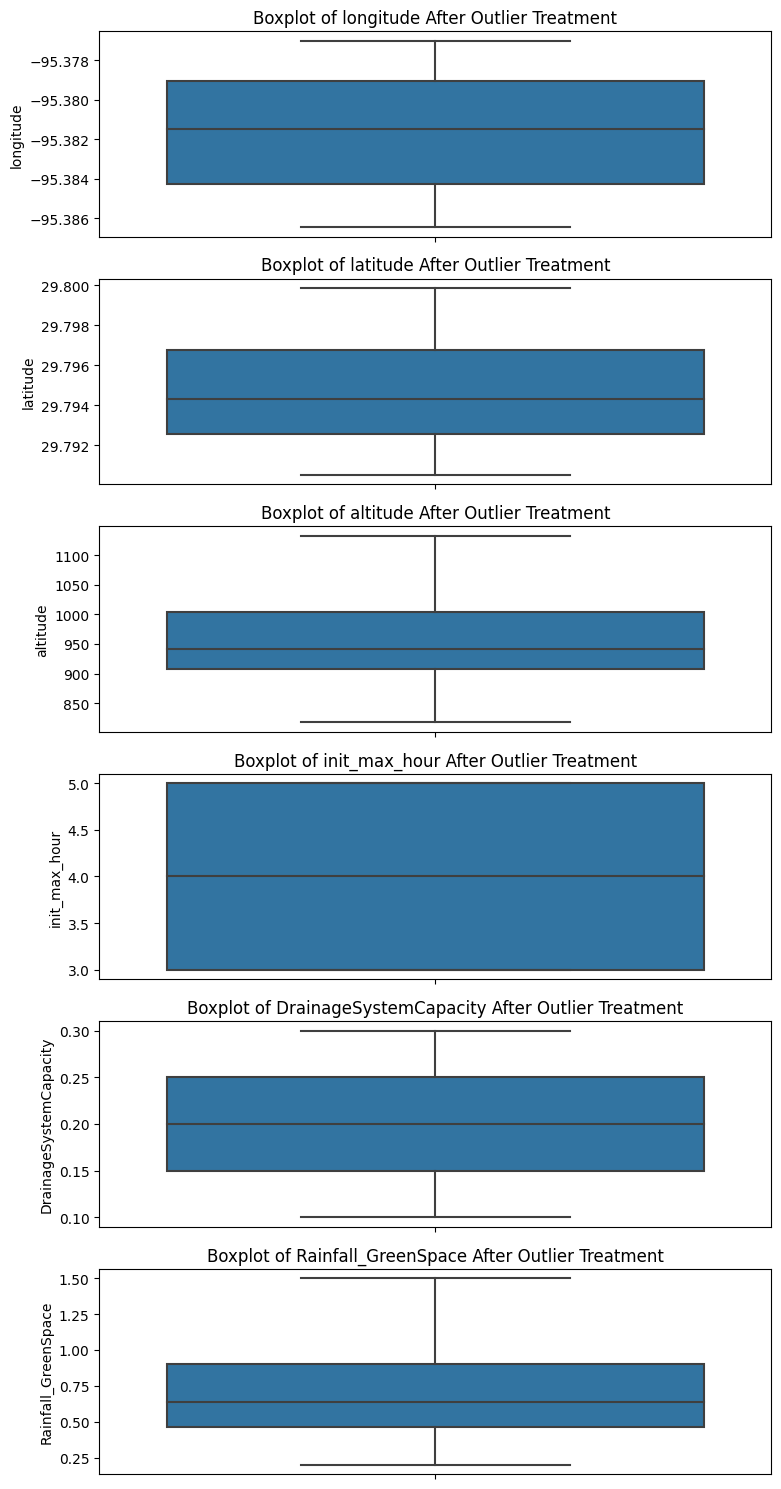

In [38]:
# Visualize the distribution of numerical features after outlier treatment using subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 15))

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Outlier Treatment')

plt.tight_layout()
plt.show()

# Drop rows with NaN values after outlier treatment
df = df.dropna()

##Handling Non-numeric Data

In [109]:
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


In [40]:
# One-hot encode
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True)

# Encode 'flooded_init' and 'flooded_final'
df.flooded_init = [1 if each == "True" else 0 for each in df.flooded_init]
df['flooded_final'] = df['flooded_final'].astype(int)


In [41]:
df.sample(5)


,longitude,latitude,altitude,init_max_hour,DrainageSystemCapacity,Rainfall_GreenSpace,flooded_init,flooded_final,SurfaceType_B,SurfaceType_C,SurfaceType_D
134382,-95.384319,29.792597,875.3,3,0.26,1.15,0,0,1,0,0
812115,-95.379082,29.791834,912.5,4,0.12,0.63,0,0,1,0,0
822660,-95.377186,29.798546,1095.8,3,0.11,0.42,0,0,0,0,1
1053352,-95.379399,29.792618,935.0,4,0.28,0.42,0,0,1,0,0
81370,-95.381868,29.794362,977.9,5,0.24,0.34,0,0,0,0,0


In [42]:
# Check for missing values
print(df.isnull().sum())

longitude                 0
latitude                  0
altitude                  0
init_max_hour             0
DrainageSystemCapacity    0
Rainfall_GreenSpace       0
flooded_init              0
flooded_final             0
SurfaceType_B             0
SurfaceType_C             0
SurfaceType_D             0
dtype: int64


##Scaling/Normalization


In [117]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [44]:
df = df.astype(np.float32)

In [ ]:
# Display basic information about the dataset
print(df.info(),'\n\n')

# Display summary statistics of numerical columns
print(df.describe(),'\n\n')

# Check for missing values
print('null count:\n\n',df.isnull().sum())

##Data Splitting

In [46]:
from sklearn.model_selection import train_test_split

# Assuming 'flooded_final' is the target variable
X = df.drop('flooded_final', axis=1)
y = df['flooded_final']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)


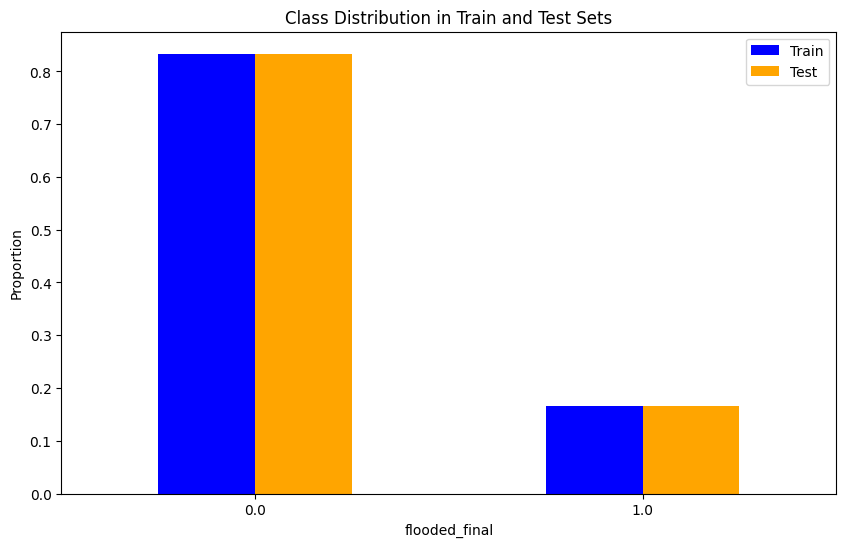

In [47]:
import matplotlib.pyplot as plt

# Calculate the class distribution in training and testing sets
y_train_dist = y_train.value_counts(normalize=True).sort_index()
y_test_dist = y_test.value_counts(normalize=True).sort_index()

# Create a DataFrame for plotting
train_test_dist = pd.DataFrame({'Train': y_train_dist, 'Test': y_test_dist})

# Plot the bar chart
ax = train_test_dist.plot.bar(rot=0, color=['blue', 'orange'], figsize=(10, 6))
plt.xlabel('flooded_final')
plt.ylabel('Proportion')
plt.title('Class Distribution in Train and Test Sets')
plt.show();


In [48]:

# Display the result
print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)


Train Data Shape:  (957222, 10) (957222,)
Test Data Shape:  (319074, 10) (319074,)


#Apply classifier Models

##Import Packages

In [49]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, mean_squared_error

import time

import seaborn as sns

##Logistic Regression

In [50]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

In [51]:
# Evaluate the performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print("\nLogistic Regression Classifier:\n")
print(f"Accuracy: {accuracy_logreg:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_logreg)
print("\nClassification Report:")
print(classification_rep_logreg)


Logistic Regression Classifier:

Accuracy: 0.8326

Confusion Matrix:
[[263753   2194]
 [ 51209   1918]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91    265947
         1.0       0.47      0.04      0.07     53127

    accuracy                           0.83    319074
   macro avg       0.65      0.51      0.49    319074
weighted avg       0.78      0.83      0.77    319074



### Logistic Regression Classifier Evaluation Summary

- **Accuracy:** The overall accuracy of the model is 83.26%. This metric represents the proportion of correctly classified instances out of the total instances.

### Confusion Matrix:

- **True Positives (TP):** 1918 instances were correctly predicted as class 1 (Flooded).
- **True Negatives (TN):** 263753 instances were correctly predicted as class 0 (Not Flooded).
- **False Positives (FP):** 2194 instances were incorrectly predicted as class 1.
- **False Negatives (FN):** 51209 instances were incorrectly predicted as class 0.

### Classification Report:

- **Precision:**
  - Precision for class 0 (Not Flooded) is 0.84, and for class 1 (Flooded) is 0.47. Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, 84% of the instances predicted as Not Flooded were actually Not Flooded, and for class 1, 47% of the instances predicted as Flooded were actually Flooded.

- **Recall (Sensitivity):**
  - Recall for class 0 is 0.99, and for class 1 is 0.04. Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, 99% of the actual Not Flooded instances were correctly classified, while for class 1, only 4% of the actual Flooded instances were correctly classified.

- **F1-Score:**
  - F1-score is the weighted average of Precision and Recall. It provides a balance between Precision and Recall. The weighted average F1-score is 0.77.

- **Support:**
  - The number of actual instances for each class is provided (265947 instances of class 0 and 53127 instances of class 1).

- **Macro Avg and Weighted Avg:**
  - These are the averages for precision, recall, and F1-score. Macro Avg treats all classes equally, while Weighted Avg considers the number of instances for each class.

### Summary:

In summary, the model has a high accuracy due to the large number of instances correctly classified as Not Flooded (class 0). However, the model struggles to correctly identify instances of Flooded (class 1), as indicated by the low recall for class 1. The precision for class 1 is also relatively low, indicating a high number of false positives. The F1-score, considering both precision and recall, is moderate. This interpretation suggests that the model might need further tuning or that the class imbalance in the data is impacting its performance, and additional techniques like resampling or adjusting class weights could be considered.


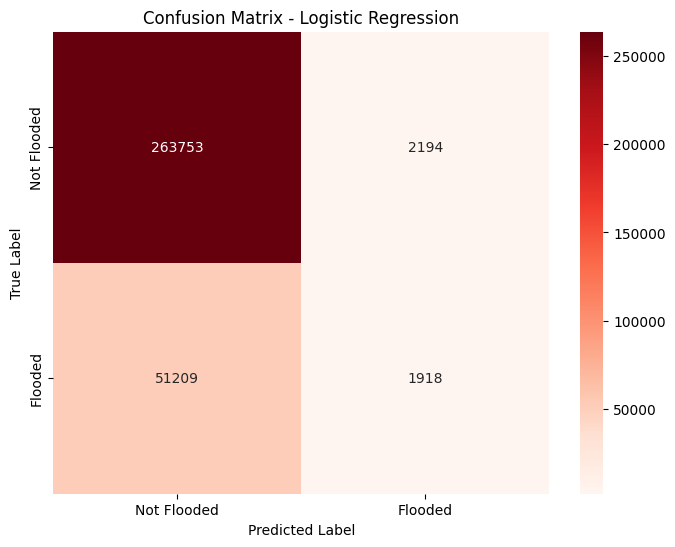

In [52]:
# Plot Confusion Matrix for Logistic Regression using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap="Reds",
            xticklabels=['Not Flooded', 'Flooded'], yticklabels=['Not Flooded', 'Flooded'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

##KNN-classifier

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)


In [ ]:
# Evaluate the performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("K-Nearest Neighbors Classifier:\n")
print(f"Accuracy: {accuracy_knn:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_rep_knn)

### K-Nearest Neighbors Classifier Evaluation Summary

- **Accuracy:** The overall accuracy of the model is 83.94%.

### Confusion Matrix:

- **True Positives (TP):** 18750 instances were correctly predicted as class 1 (Flooded).
- **True Negatives (TN):** 249092 instances were correctly predicted as class 0 (Not Flooded).
- **False Positives (FP):** 16855 instances were incorrectly predicted as class 1.
- **False Negatives (FN):** 34377 instances were incorrectly predicted as class 0.

### Classification Report:

- **Precision:**
  - Precision for class 0 (Not Flooded) is 0.88, and for class 1 (Flooded) is 0.53. Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, 88% of the instances predicted as Not Flooded were actually Not Flooded, and for class 1, 53% of the instances predicted as Flooded were actually Flooded.

- **Recall (Sensitivity):**
  - Recall for class 0 is 0.94, and for class 1 is 0.35. Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, 94% of the actual Not Flooded instances were correctly classified, while for class 1, 35% of the actual Flooded instances were correctly classified.

- **F1-Score:**
  - F1-score is the weighted average of Precision and Recall. It provides a balance between Precision and Recall. The weighted average F1-score is 0.83.

- **Support:**
  - The number of actual instances for each class is provided (265947 instances of class 0 and 53127 instances of class 1).

- **Summary:**
  - The K-Nearest Neighbors classifier has a good accuracy, with high precision and recall for class 0 (Not Flooded) and moderate precision and recall for class 1 (Flooded). The F1-score indicates a reasonable balance between precision and recall. This suggests that the model performs well, particularly in correctly identifying instances of Not Flooded, but there is room for improvement in correctly identifying instances of Flooded.


In [ ]:
# Plot Confusion Matrix for K-Nearest Neighbors classifier using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap="Reds",
            xticklabels=['Not Flooded', 'Flooded'], yticklabels=['Not Flooded', 'Flooded'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - K-Nearest Neighbors classifier')
plt.show();

##Decision Tree Classifier

In [128]:

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)


In [129]:
# Evaluate the performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Print the results
print("\nDecision Tree Classifier:\n")
print(f"Accuracy: {accuracy_dt:.4f}\n")
print("Confusion Matrix:\n")
print(conf_matrix_dt)
print("\nClassification Report:")
print(classification_rep_dt)


Decision Tree Classifier:

Accuracy: 0.8978

Confusion Matrix:

[[253656  12291]
 [ 20306  32821]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94    265947
         1.0       0.73      0.62      0.67     53127

    accuracy                           0.90    319074
   macro avg       0.83      0.79      0.80    319074
weighted avg       0.89      0.90      0.89    319074



### Decision Tree Classifier Evaluation Summary

- **Accuracy:** The overall accuracy of the Decision Tree model is 89.78%.

### Confusion Matrix:

- **True Positives (TP):** 32821 instances were correctly predicted as class 1 (Flooded).
- **True Negatives (TN):** 253656 instances were correctly predicted as class 0 (Not Flooded).
- **False Positives (FP):** 12291 instances were incorrectly predicted as class 1.
- **False Negatives (FN):** 20306 instances were incorrectly predicted as class 0.

### Classification Report:

- **Precision:**
  - Precision for class 0 (Not Flooded) is 0.93, and for class 1 (Flooded) is 0.73. Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class 0, 93% of the instances predicted as Not Flooded were actually Not Flooded, and for class 1, 73% of the instances predicted as Flooded were actually Flooded.

- **Recall (Sensitivity):**
  - Recall for class 0 is 0.95, and for class 1 is 0.62. Recall is the ratio of correctly predicted positive observations to all observations in the actual class. For class 0, 95% of the actual Not Flooded instances were correctly classified, while for class 1, 62% of the actual Flooded instances were correctly classified.

- **F1-Score:**
  - F1-score is the weighted average of Precision and Recall. It provides a balance between Precision and Recall. The weighted average F1-score is 0.89.

- **Support:**
  - The number of actual instances for each class is provided (265947 instances of class 0 and 53127 instances of class 1).

- **Summary:**
  - The Decision Tree classifier performs well, achieving high accuracy, precision, and recall for class 0 (Not Flooded). However, there is room for improvement in recall for class 1 (Flooded). The F1-score indicates a good balance between precision and recall, suggesting overall strong performance of the model.


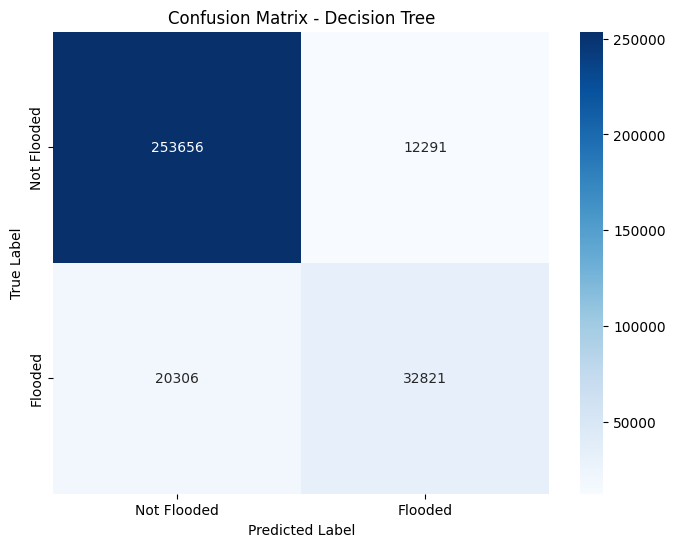

In [130]:

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues", xticklabels=['Not Flooded', 'Flooded'], yticklabels=['Not Flooded', 'Flooded'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show();


## Models Comparison Summary

### K-Nearest Neighbors (KNN) Classifier:
- **Accuracy:** 0.8394
- **Precision:** 0.88 (Class 0), 0.53 (Class 1)
- **Recall:** 0.94 (Class 0), 0.35 (Class 1)
- **F1-Score:** 0.91 (Class 0), 0.42 (Class 1)
- **Support:** 265947 instances of Class 0, 53127 instances of Class 1

### Logistic Regression Classifier:
- **Accuracy:** 0.8326
- **Precision:** 0.84 (Class 0), 0.47 (Class 1)
- **Recall:** 0.99 (Class 0), 0.04 (Class 1)
- **F1-Score:** 0.91 (Class 0), 0.07 (Class 1)
- **Support:** 265947 instances of Class 0, 53127 instances of Class 1

### Decision Tree Classifier:
- **Accuracy:** 0.8978
- **Precision:** 0.93 (Class 0), 0.73 (Class 1)
- **Recall:** 0.95 (Class 0), 0.62 (Class 1)
- **F1-Score:** 0.94 (Class 0), 0.67 (Class 1)
- **Support:** 265947 instances of Class 0, 53127 instances of Class 1

In summary, the Decision Tree classifier outperforms both K-Nearest Neighbors (KNN) and Logistic Regression in terms of accuracy and F1-Score on this dataset. It demonstrates higher precision and recall for both classes, indicating better overall performance.


In [ ]:
# Assuming you have already trained Decision Tree, KNN, and Logistic Regression classifiers

# Print the results
print("\nK-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn:.4f}")
print("Classification Report:")
print(classification_rep_knn)

print("\nLogistic Regression Classifier:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print("Classification Report:")
print(classification_rep_logreg)

print("\nDecision Tree Classifier:\n")
print(f"Accuracy: {accuracy_dt:.4f}\n")
print("\nClassification Report:")
print(classification_rep_dt)


#Hyperparameter Tuning

##Cross-Validation

In [ ]:
from sklearn.utils import shuffle

# Define the batch generator function
def batch_generator(X, y, batch_size):
    # Shuffle the data before creating batches
    X, y = shuffle(X, y, random_state=42)
    for i in range(0, len(X), batch_size):
        yield X[i:i+batch_size], y[i:i+batch_size]

In [ ]:

# Define a function to create a batch generator
def batch_generator(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield X[i:i + batch_size], y[i:i + batch_size]

# Define a timeout exception
class TimeoutError(Exception):
    pass

# Assuming X_train and y_train are your full dataset
# Split the data into a smaller subset for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train,
                                                        test_size=0.999,
                                                        random_state=42)

# Define the Polynomial Regression pipeline with Ridge and Lasso
poly_reg_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),  # Polynomial features
    ('scaler', StandardScaler()),  # Standardize the features
    ('pca', PCA(n_components=0.95)),  # PCA for dimensionality reduction
    ('regressor', Ridge())  # Ridge regression as default
])

# Define hyperparameters to tune
param_dist = {
    'poly_features__degree': [3, 5, 7, 8, 10],  # Polynomial degrees
    'pca__n_components': [0.8, 0.9, 0.95],  # Adjust the explained variance threshold
    'regressor': [Ridge(), Lasso()],  # Ridge and Lasso as options
    'regressor__alpha': [1e-4, 1e-3, 1e-2, 0.1]  # Regularization strength
}

# Use neg_mean_squared_error as a scoring metric
scoring_metric = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    poly_reg_pipeline,
    param_distributions=param_dist,
    scoring=scoring_metric,
    cv=5,
    n_iter=5,  # Adjust the number of iterations based on computational resources
    random_state=42
)

# Batch processing in smaller subsets with time limit
batch_size = 1000
start_time = time.time()
time_limit = 400  # ~ 5 minutes in seconds

for X_batch, y_batch in batch_generator(X_train_subset, y_train_subset, batch_size):
    random_search.fit(X_batch, y_batch)

    elapsed_time = time.time() - start_time

    if elapsed_time > time_limit:
        print(f"Execution exceeded the time limit of {time_limit} seconds. Aborting.")
        raise TimeoutError("Execution time exceeded the limit.")


In [ ]:
# Get the best hyperparameters and the best model
best_hyperparameters = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)


In [ ]:
# Convert probabilities to binary predictions using a threshold
y_pred_best = (y_pred_best >= 0.5).astype(int)

# Evaluate performance metrics
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

# Display performance metrics
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

In [ ]:
best_model = random_search.best_estimator_

# Extract degree and coefficients
degree = best_model.named_steps['poly_features'].degree
coef = best_model.named_steps['regressor'].coef_

# Plot the coefficients based on the polynomial degree
plt.figure(figsize=(12, 6))
plt.bar(range(len(coef)), abs(coef), color='g', alpha=0.7)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title(f'Coefficients vs Polynomial Degree (Degree {degree})')
plt.grid(True)
plt.show()

##Ridge & Lasso

Ridge(L2-Regularizarion):
$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2$$

Lass(L1-Regularizarion):
$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |W_j|$$

##Report Summary about Best Logestic Regression Model after HP by Means of CV
**Classification Report Summary:**

- **Accuracy:** 83.3%


- **Interpretation:**
  - The model achieved high accuracy (83.3%), mainly due to the dominance of class 0 instances (Not Flooded).
  - However, it struggles to correctly identify instances of class 1 (Flooded), as indicated by the low recall for class 1.
  - Precision for class 1 is relatively low, suggesting a high number of false positives.
  - The F1-score, considering both precision and recall, is moderate.

- **Recommendations:**
  - Further tuning may be required to improve the model's ability to identify instances of class 1.
  - Consider addressing the class imbalance in the data using techniques like resampling or adjusting class weights.



# Visualizataion
If you want to plot your results or any examples (csv) - use the following function `visualize`
- this is just for yourself to see if your results make sense or not
- the function needs df (coming from the csv with these columns:  'head_id', 'tail_id', 'flooded_init', 'flooded_final'
- If you want to visualize properly don't change G's bbox information

In [56]:
!pip install osmnx
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox


In [278]:
def visualize(G, df, filename, plot=False, figsize=(5,5)):
    # Edge colors based on the 'flooded_init' and 'flooded_final' columns
    ec = []

    # Extract the unique edges from the dataframe
    flooded_init_edges = set(tuple(x) for x in df[df['flooded_init']][['head_id', 'tail_id']].to_numpy())
    flooded_final_edges = set(tuple(x) for x in df[df['flooded_final']][['head_id', 'tail_id']].to_numpy())

    for u, v, k in G.edges(keys=True):
        if (u, v) in flooded_init_edges or (v, u) in flooded_init_edges:
            ec.append('slateblue')
        elif (u, v) in flooded_final_edges or (v, u) in flooded_final_edges:
            ec.append('cyan')
        else:
            ec.append('silver')

    fig, ax = ox.plot_graph(G, edge_color=ec, node_size=0, edge_linewidth=5, figsize=figsize, show=plot, close=False)  # Generate the plot only if plot or save is True

    # Save the figure only if save is True
    if not plot:
        plt.savefig(filename, dpi=75, bbox_inches='tight')
        plt.close(fig)

    return (fig, ax) if plot else None  # Return the figure and axis if plot is True, otherwise return None


In [58]:
# Create graph from bounding box -- this is just for visualization
G = ox.graph_from_bbox(29.79, 29.80, -95.377, -95.387, network_type='drive')  # G is a graph(network) used for visualization


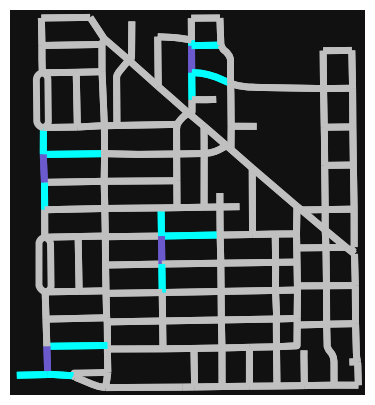

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [184]:
# Load the DataFrame from your CSV file
df = pd.read_csv('/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/example.csv')

# Call the function to either plot or to save with any filename like './example.png'
visualize(G, df, '/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/example.png', plot=True)
# if you want to save as png, set plot=False


# Saving (Serializing) Model

In [133]:
import joblib

# Save the model to a file
model_filename = 'decision_tree_model.joblib'
joblib.dump(dt_classifier, model_filename)

['decision_tree_model.joblib']

#Final Prediction on Test.csv

In [226]:
ts_df = []
ts_h_t = []

# Merge the test dataset with edge_info_df based on head_id and tail_id
ts_df = pd.merge(edge_info_df[['head_id', 'longitude', 'latitude', 'altitude']],
              final_test_df, how='right', on='head_id')

ts_h_t = pd.merge(edge_info_df[['head_id', 'tail_id','longitude']], final_test_df,
                  how= 'right', on=['head_id', 'tail_id'])
ts_h_t = ts_h_t[['head_id', 'tail_id', 'longitude','ObservationIndex']] #will use for visulization

# Drop the original head_id and tail_id columns
ts_df.drop(['head_id', 'tail_id'], axis=1, inplace=True)


ts_df.sample(5, random_state=42)



,longitude,latitude,altitude,ObservationIndex,SurfaceType,RainfallIntensity,init_max_hour,DrainageSystemCapacity,GreenSpaceRatio,flooded_init
3182,-95.385191,29.792273,901.7,7,D,5,3,0.19,0.22,False
82171,-95.380705,29.797653,881.5,189,C,3,3,0.12,0.10,False
22576,-95.381690,29.797265,915.3,52,D,5,4,0.17,0.30,False
35127,-95.381157,29.796870,925.2,81,C,5,5,0.27,0.15,False
62698,-95.378354,29.792117,902.2,144,B,3,4,0.28,0.29,False


##Prepocessing

In [227]:
#Create an interaction term between 'RainfallIntensity' and 'GreenSpaceRatio'
ts_df['Rainfall_GreenSpace'] = ts_df['RainfallIntensity'] * ts_df['GreenSpaceRatio']

# Drop the original GreenSpaceRatio and RainfallIntensity columns
ts_df.drop(['GreenSpaceRatio', 'RainfallIntensity'], axis=1, inplace=True)

# Reorder columns for better clarity
ts_df = ts_df[['longitude', 'latitude', 'altitude', 'SurfaceType',
                     'init_max_hour','DrainageSystemCapacity', 'Rainfall_GreenSpace',
                     'flooded_init']]

In [228]:
ts_df.sample(5, random_state=42)

,longitude,latitude,altitude,SurfaceType,init_max_hour,DrainageSystemCapacity,Rainfall_GreenSpace,flooded_init
3182,-95.385191,29.792273,901.7,D,3,0.19,1.10,False
82171,-95.380705,29.797653,881.5,C,3,0.12,0.30,False
22576,-95.381690,29.797265,915.3,D,4,0.17,1.50,False
35127,-95.381157,29.796870,925.2,C,5,0.27,0.75,False
62698,-95.378354,29.792117,902.2,B,4,0.28,0.87,False


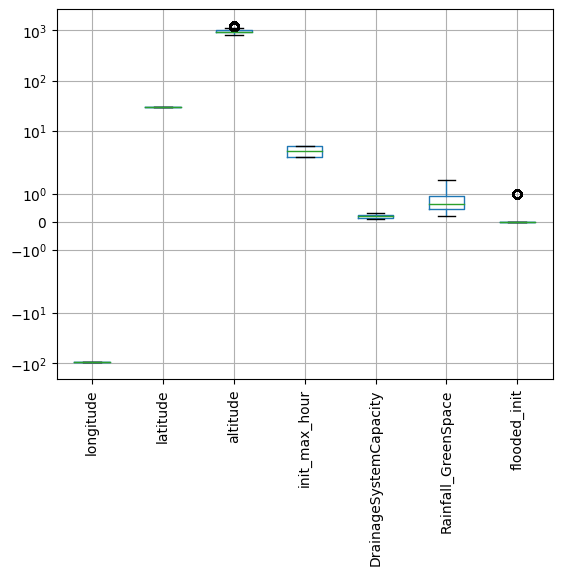

In [229]:
#outlier checking

ts_df.boxplot(rot=90)
plt.yscale('symlog')
plt.show()


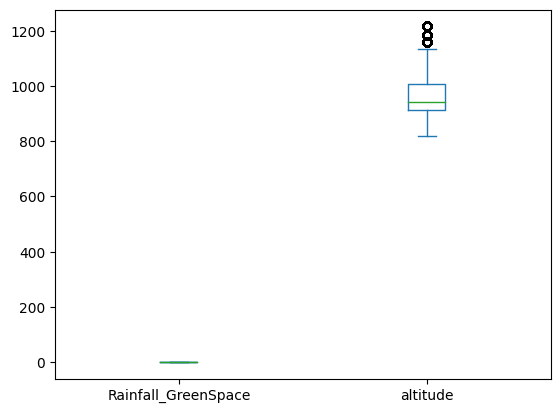

In [230]:
#closer look for the outliers
ax = ts_df.plot.box(column=["Rainfall_GreenSpace","altitude"])

In [231]:
# Specify the numeric columns you want to handle outliers for
numeric_columns = ts_df.select_dtypes(include=['number']).columns


# Calculate IQR for each numeric column
Q1 = ts_df[numeric_columns].quantile(0.25)
Q3 = ts_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((ts_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (ts_df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Remove outliers from the DataFrame
ts_df = ts_df[~outliers.any(axis=1)]

# Display the cleaned DataFrame
print(ts_df)

       longitude   latitude  altitude SurfaceType  init_max_hour  \
0     -95.382821  29.798740     957.0           D              4   
1     -95.383237  29.798445     921.2           D              4   
2     -95.382354  29.797764     876.0           D              4   
3     -95.382821  29.798740     957.0           D              4   
4     -95.383237  29.798445     921.2           D              4   
...          ...        ...       ...         ...            ...   
86595 -95.386112  29.795351     828.0           C              4   
86596 -95.381934  29.790545     939.5           C              4   
86597 -95.382500  29.795060     955.8           C              4   
86598 -95.385248  29.790811    1011.0           C              4   
86599 -95.377183  29.794025    1082.3           C              4   

       DrainageSystemCapacity  Rainfall_GreenSpace  flooded_init  
0                        0.22                 1.12          True  
1                        0.22                 1.1

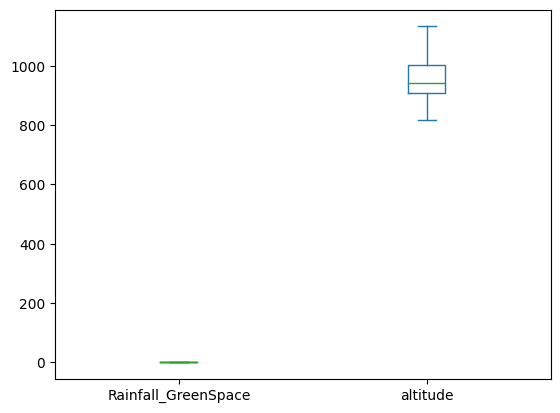

In [232]:
#After outlier removal
ax = ts_df.plot.box(column=["Rainfall_GreenSpace","altitude"])

##Handling Non-numeric Data

In [233]:
categorical_columns = ts_df.select_dtypes(include=['object']).columns

# One-hot encode
ts_df = pd.get_dummies(ts_df, columns=categorical_columns,
                       prefix=categorical_columns, drop_first=True)

# Encode 'flooded_init' and 'flooded_final'
ts_df.flooded_init = [1 if each == "True" else 0 for each in ts_df.flooded_init]


##Normilize

In [237]:
# Normalize numerical features
scaler = MinMaxScaler()
ts_df[numeric_columns] = scaler.fit_transform(ts_df[numeric_columns])

In [238]:
# Display basic information about the dataset
print(ts_df.info(),'\n\n')

# Display summary statistics of numerical columns
print(ts_df.describe(),'\n\n')

# Check for missing values
print('null count:\n\n',ts_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85200 entries, 0 to 86599
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               85200 non-null  float64
 1   latitude                85200 non-null  float64
 2   altitude                85200 non-null  float64
 3   init_max_hour           85200 non-null  float64
 4   DrainageSystemCapacity  85200 non-null  float64
 5   Rainfall_GreenSpace     85200 non-null  float64
 6   flooded_init            85200 non-null  int64  
 7   SurfaceType_B           85200 non-null  uint8  
 8   SurfaceType_C           85200 non-null  uint8  
 9   SurfaceType_D           85200 non-null  uint8  
dtypes: float64(6), int64(1), uint8(3)
memory usage: 5.4 MB
None 


          longitude      latitude      altitude  init_max_hour  \
count  85200.000000  85200.000000  85200.000000   85200.000000   
mean       0.527715      0.437952      0.435383       0

In [239]:
ts_df.to_csv('/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/normalized_test_data.csv', index=False)
#save normilized test set

##Apply Model on test set

In [240]:
# Load the saved model
loaded_dt_model = joblib.load('decision_tree_model.joblib')

# Apply the loaded model to make predictions on X_test
predictions = loaded_dt_model.predict(ts_df)

# Add the predictions to the test_df DataFrame as a new column
ts_df['flooded_final'] = predictions


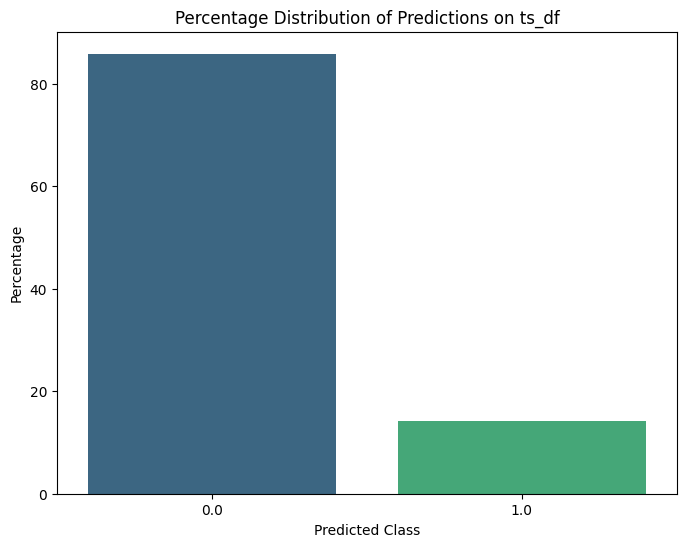

Percentage of False values in 'predicted_flooded': 85.88%


In [241]:
y_ts_df_pred = ts_df['flooded_final']

# Count the occurrences of each predicted class
prediction_counts = pd.Series(y_ts_df_pred).value_counts()

percentage_distribution = prediction_counts / len(y_ts_df_pred) * 100

# Plot the distribution using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values, palette='viridis')
plt.title('Percentage Distribution of Predictions on ts_df')
plt.xlabel('Predicted Class')
plt.ylabel('Percentage')
plt.show();

# Print the percentage of False values
percentage_false = percentage_distribution.iloc[0]
print(f"Percentage of False values in 'predicted_flooded': {percentage_false:.2f}%")

## Visualizataion on test parameters

In [271]:
import os

# Create a new directory to save the results
output_dir = 'observation_results'
os.makedirs(output_dir, exist_ok=True)

# Assuming ts_h_t and ts_df are your DataFrames
# Add a temporary index to both DataFrames
ts_h_t['temp_index'] = ts_h_t.index
ts_df['temp_index'] = ts_df.index

# Merge based on the temporary index
merged_df = pd.merge(ts_h_t, ts_df, on='temp_index', how='inner')

# Drop the temporary index
merged_df.drop('temp_index', axis=1, inplace=True)

# Iterate over unique ObservationIndex values
for obs_index in merged_df['ObservationIndex'].unique():
    # Slice the merged DataFrame for the current ObservationIndex
    slice_df = merged_df[merged_df['ObservationIndex'] == obs_index]

    # Create a new DataFrame with the desired columns
    result_df = slice_df[['head_id', 'tail_id', 'flooded_init', 'flooded_final']]

    # Save the new DataFrame to a CSV file in the specified directory
    file_name = os.path.join(output_dir, f'observation_{obs_index}.csv')
    result_df.to_csv(file_name, index=False)

result_df.sample(4)


,head_id,tail_id,flooded_init,flooded_final
37441,152361419,152541735,0,1.0
37554,152909799,152909812,0,0.0
37556,152909821,152909828,0,0.0
37513,152600233,152600236,0,0.0


In [291]:
def visualize(G, df, filename, plot=False, figsize=(5, 5)):
    ec = []  # Edge colors based on the 'flooded_init' and 'flooded_final' columns
    flooded_init_edges = set([tuple(x) for x in df[df['flooded_init'] != 0][['head_id', 'tail_id']].to_numpy()])
    flooded_final_edges = set([tuple(x) for x in df[df['flooded_final'] != 0][['head_id', 'tail_id']].to_numpy()])

    for u, v, k in G.edges(keys=True):
        if (u, v) in flooded_init_edges or (v, u) in flooded_init_edges:
            ec.append('slateblue')
        elif (u, v) in flooded_final_edges or (v, u) in flooded_final_edges:
            ec.append('cyan')
        else:
            ec.append('silver')

    fig, ax = ox.plot_graph(G, edge_color=ec, node_size=0, edge_linewidth=5, figsize=figsize, show=plot, close=False)  # Generate the plot only if plot or save is True

    # Save the figure only if save is True
    if not plot:
        plt.savefig(filename, dpi=75, bbox_inches='tight')
        plt.close(fig)

    return (fig, ax) if plot else None  # Return the figure and axis if plot is True, otherwise return None


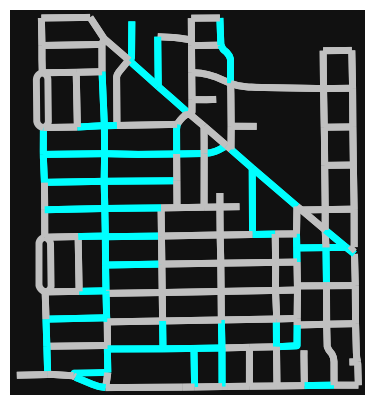

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [293]:

# Call the function to either plot or to save with any filename like './example.png'
visualize(G, result_df, '/content/drive/MyDrive/Mythings/Polimi/ML/Project/MLAssignment202324/example1.png', plot=True)
# if you want to save as png, set plot=False
